## importing libraries

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np, pandas as pd, matplotlib as mpl

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
tf.__version__

'2.12.0'

## classifcation

dataset of 60,000 28 by 28 gray scal images of 10 fashion categories

with a test set of 10,000 images

class labels 

|Label | Description|
| --- |---|
| 0 | T-Shirt|
| 1 |Trouser|
| 2 | Pullover|
| 3 | Dress|
| 4 | Coat|
| 5 | sandal|
| 6 | Shirt|
| 7 | Sneaker|
| 8 | Bag|
| 9 | Ankle boot|


In [ ]:
#load the dataset from keras
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
# set taining and test samples
(X_train_full, y_train_full),(X_test, y_test) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


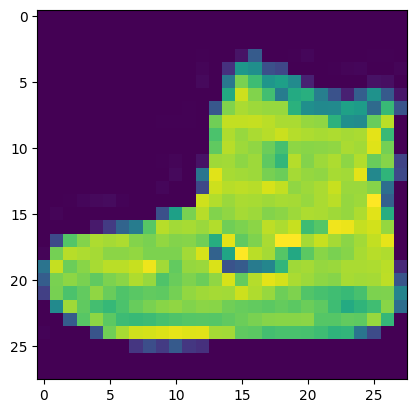

In [ ]:
# viewing the first item in the data set
plt.imshow(X_train_full[0])

In [ ]:
# to print the class of the object we use the y train
y_train_full[0]

9

The output is zero which signifies ankle boots from keras dataset

we need to set class names to properly classify or name them

In [ ]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boor']

In [ ]:
# now we can get the right name
class_names[y_train_full[5]]

'Pullover'

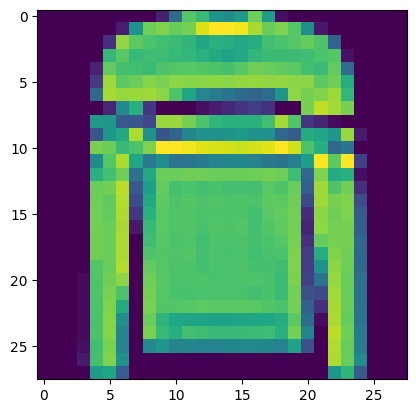

In [ ]:
plt.imshow(X_train_full[5])

In [ ]:
# view the pixel values of this 28 by 28 image
X_train_full[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

### normalization of the pixel values

In [ ]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

**Split the data inti train/ validation / test datasets**

- Training data used for training the model
- validation data use for tuning the hyperparameters and evaluate the models
- Test data used to test the model after the modeln has gone through intial vetting by the validation set

In [ ]:
# recall we have 60k for training and 10k for testing

X_valid, X_train = X_train_n[0:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[0:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

## create the model

In [ ]:
# to get the same result each time the model is run we would use random seed
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [ ]:
model.add(keras.layers.Dense(300, activation= 'relu'))
model.add(keras.layers.Dense(100, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# to view the model
import pydot

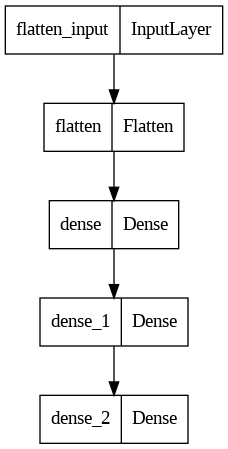

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# accessing the parameters
weights, biases = model.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
weights

array([[-0.04274117,  0.01071303, -0.00873026, ..., -0.05784225,
         0.0614008 ,  0.01370978],
       [-0.00865921, -0.02390176,  0.02022588, ...,  0.06249338,
         0.02326747,  0.07382563],
       [-0.01583556, -0.0478615 ,  0.04245413, ...,  0.05045788,
         0.05537929,  0.00919805],
       ...,
       [ 0.03997523, -0.04490833,  0.01827781, ...,  0.02175307,
        -0.05661419, -0.05022408],
       [ 0.03285684,  0.06395964, -0.02041747, ..., -0.06354806,
        -0.0568707 ,  0.00366315],
       [ 0.06083046, -0.02130269, -0.00545757, ..., -0.07150498,
        -0.00534742,  0.05755487]], dtype=float32)

In [ ]:
biases.shape

(300,)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

> note 

the weights and biases are randomly generated

after creating the model structure we need to set up the learninf process using the compile function

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=30,
                          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2258 - accuracy: 0.9193 - val_loss: 0.2928 - val_accuracy: 0.8918
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2217 - accuracy: 0.9200 - val_loss: 0.2900 - val_accuracy: 0.8984
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2182 - accuracy: 0.9222 - val_loss: 0.3055 - val_accuracy: 0.8912
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2146 - accuracy: 0.9224 - val_loss: 0.2919 - val_accuracy: 0.8948
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2120 - accuracy: 0.9241 - val_loss: 0.2972 - val_accuracy: 0.8950
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2080 - accuracy: 0.9244 - val_loss: 0.2907 - val_accuracy: 0.8932
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2042 - accuracy: 0.9271 - val_loss: 0.3137 - val_accu

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
model_history.history

{'loss': [0.22579170763492584,
  0.2216983139514923,
  0.2182312309741974,
  0.21462225914001465,
  0.2119714468717575,
  0.2080203890800476,
  0.20416660606861115,
  0.20104655623435974,
  0.197935551404953,
  0.19560758769512177,
  0.1924406737089157,
  0.1889285445213318,
  0.18609382212162018,
  0.18444713950157166,
  0.1811370551586151,
  0.1772764027118683,
  0.17529325187206268,
  0.17301398515701294,
  0.16982725262641907,
  0.16644735634326935,
  0.16487330198287964,
  0.16193310916423798,
  0.15954074263572693,
  0.15711969137191772,
  0.15540693700313568,
  0.1523132473230362,
  0.15020234882831573,
  0.14672315120697021,
  0.1454196721315384,
  0.14146946370601654],
 'accuracy': [0.9192909002304077,
  0.919981837272644,
  0.9222000241279602,
  0.9224363565444946,
  0.9241454601287842,
  0.9244182109832764,
  0.9271454811096191,
  0.928490936756134,
  0.9286909103393555,
  0.930545449256897,
  0.9309454560279846,
  0.9330727458000183,
  0.9334181547164917,
  0.93412727117538

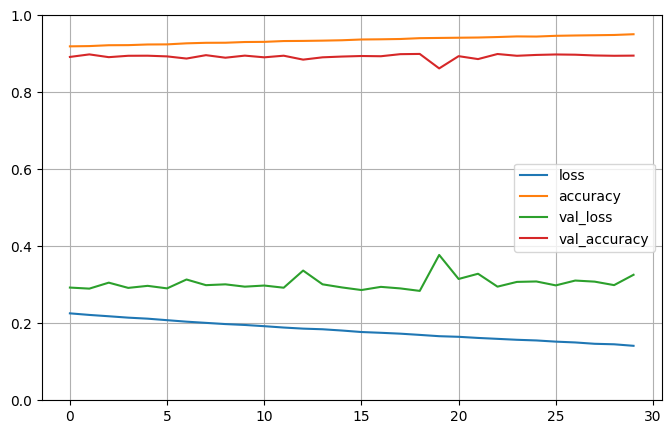

In [ ]:
#plot the information above to visualise how accuracy is increasing during each epoch

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## evaluating the performance and predicting

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3511 - accuracy: 0.8888


[0.35110825300216675, 0.8888000249862671]

In [ ]:
# since we dont have new dataset to test we use the first 3 data for testing
X_new = X_test[:3]

We can predict 2 things
1. the probability of each class
2. the class itself

In [ ]:
y_prob = model.predict(X_new) #class probability
y_prob.round(3)

1/1 [==============================] - 0s 54ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.999],
       [0.   , 0.   , 0.998, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
# y_pred = model.predict_classes(X_new) # classes prediction
# y_pred # this doesnt work in the updated version of keras
classes_x = np.argmax(y_prob,axis=1)

In [ ]:
classes_x

array([9, 2, 1])

In [ ]:
# to get the class names
np.array(class_names)[classes_x]

array(['Ankle boor', 'Pullover', 'Trouser'], dtype='<U10')

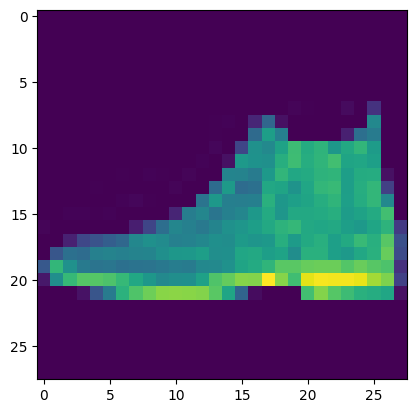

In [ ]:
plt.imshow(X_test[0])

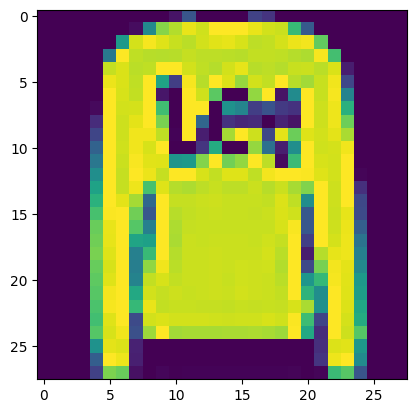

In [ ]:
plt.imshow(X_test[1])

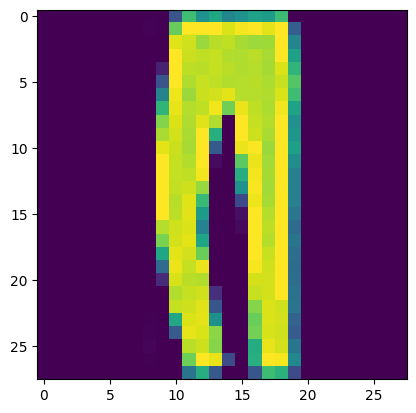

In [ ]:
plt.imshow(X_test[2])